In [21]:
import numpy as np 
import torch
import torch.distributions as dist
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
dice = dist.Categorical(probs=torch.tensor([1/6]*6))

# Sample N dice rolls
N = 1000

rolls = dice.sample((N,)) + 1
# 1 is added to the sample because the sample is 0-indexed

In [13]:
rolls[:10]

tensor([4, 3, 4, 3, 1, 6, 3, 2, 5, 1])

Text(0.5, 0, 'Roll number')

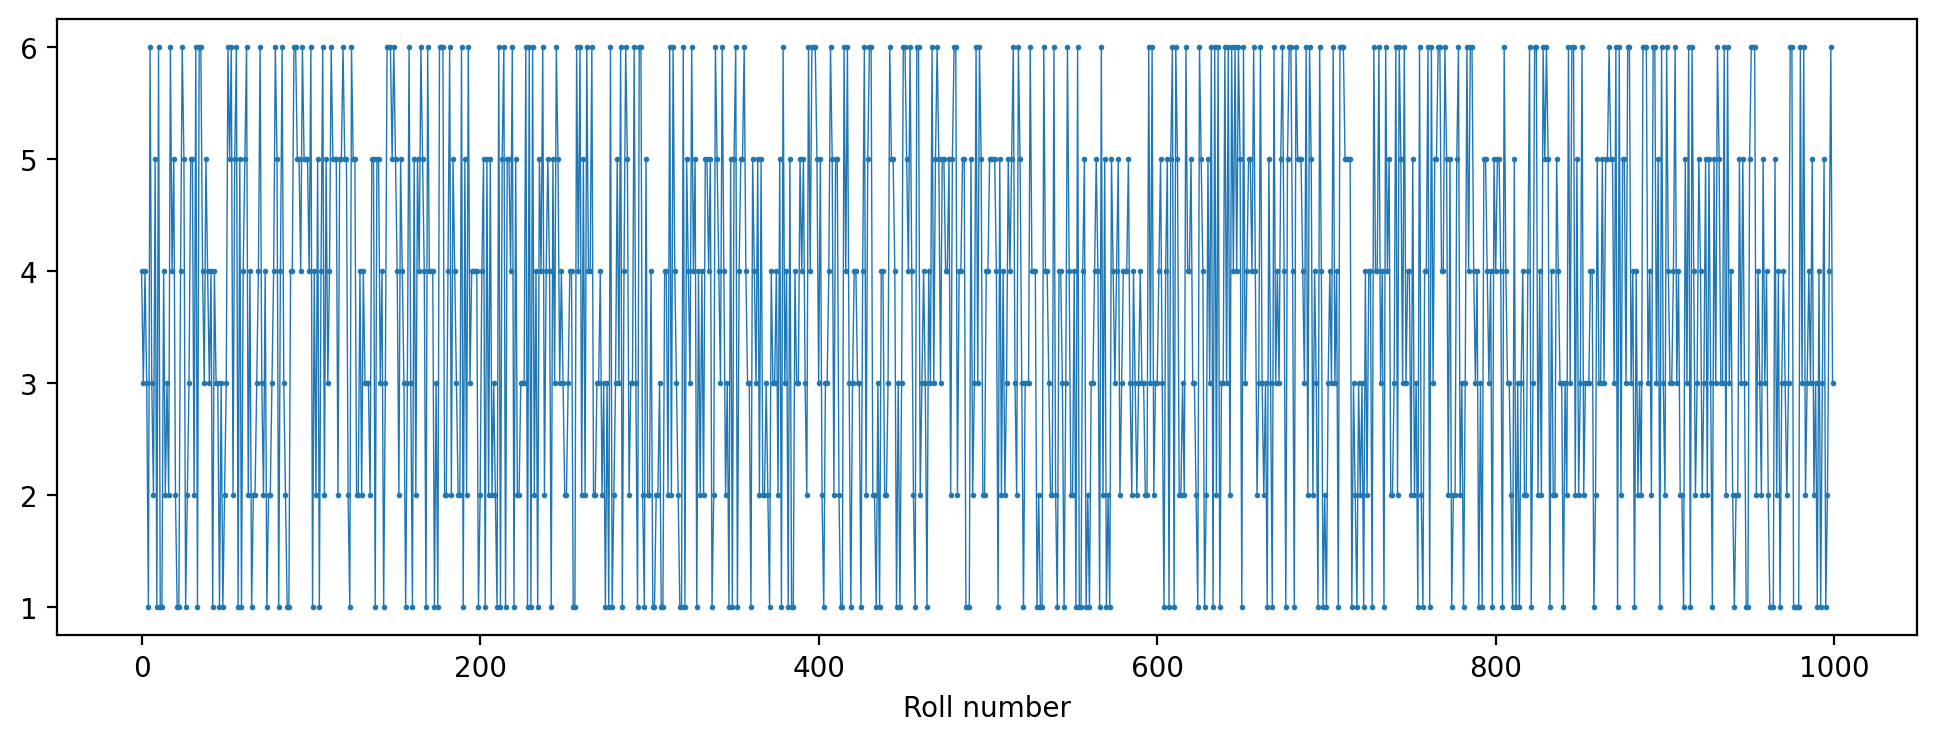

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(rolls, lw=0.5, marker='o', markersize=1)
ax.set_xlabel('Roll number')

In [15]:
# Running average
runing_avg = torch.cumsum(rolls, dim=0) / torch.arange(1, N+1)


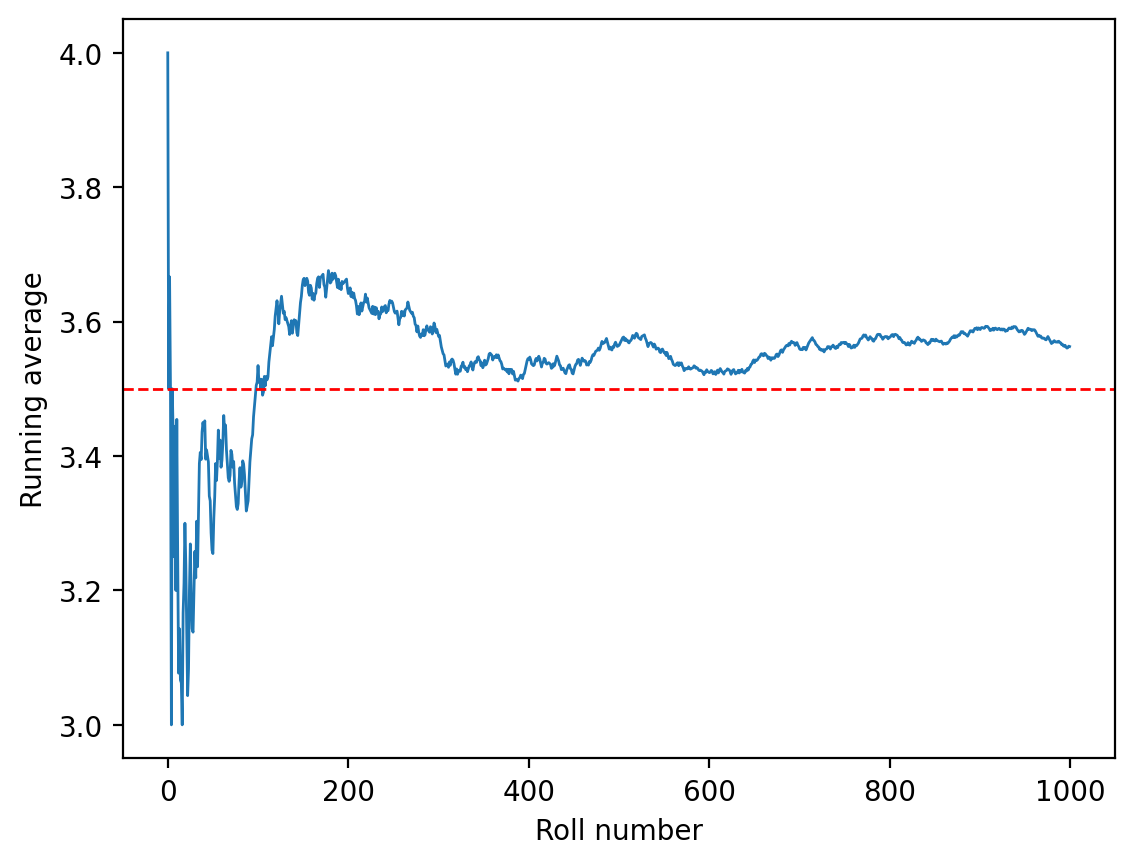

In [17]:
plt.plot(runing_avg, lw=1)
plt.xlabel('Roll number')
plt.ylabel('Running average')
plt.axhline(3.5, color='red', lw=1, ls='--')

In [18]:
def compute_running_avg(N):
    rolls = dice.sample((N,)) + 1
    runing_avg = torch.cumsum(rolls, dim=0) / torch.arange(1, N+1)
    return runing_avg


In [27]:
out = {}
for N in [10, 100, 1000, 10000]:
    out[N] = {}
    for expt in range(10):
        out[N][expt] = compute_running_avg(N)[-1].item()


In [28]:
df = pd.DataFrame(out)

In [29]:
df

,10,100,1000,10000
0,4.3,3.64,3.450,3.4836
1,4.0,3.64,3.505,3.4902
2,3.7,3.68,3.451,3.5069
3,3.1,3.48,3.530,3.4925
4,5.0,3.57,3.577,3.4874
5,3.4,3.56,3.522,3.4834
6,3.2,3.53,3.447,3.5080
7,3.0,3.62,3.499,3.5039
8,2.5,3.61,3.506,3.4945
9,3.1,3.47,3.536,3.5158


<Axes: >

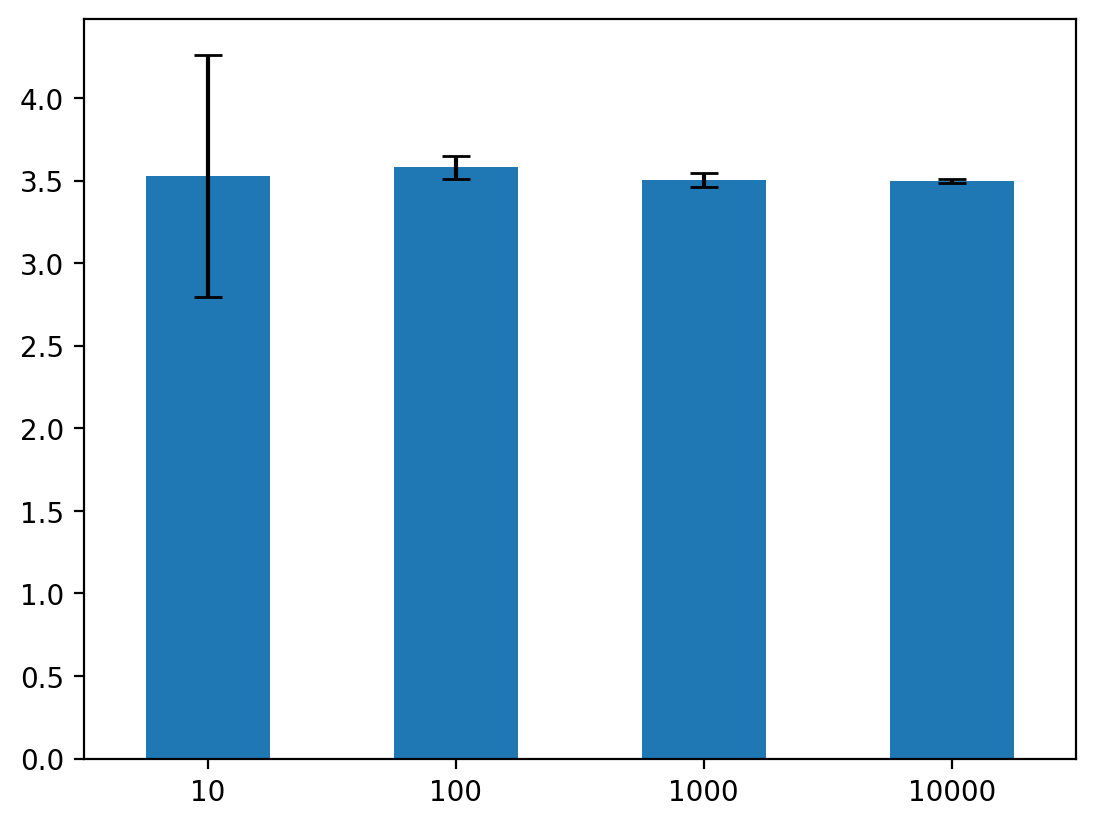

In [33]:
df.mean(axis=0).plot(kind='bar', yerr=df.std(axis=0), capsize=5, rot=0)

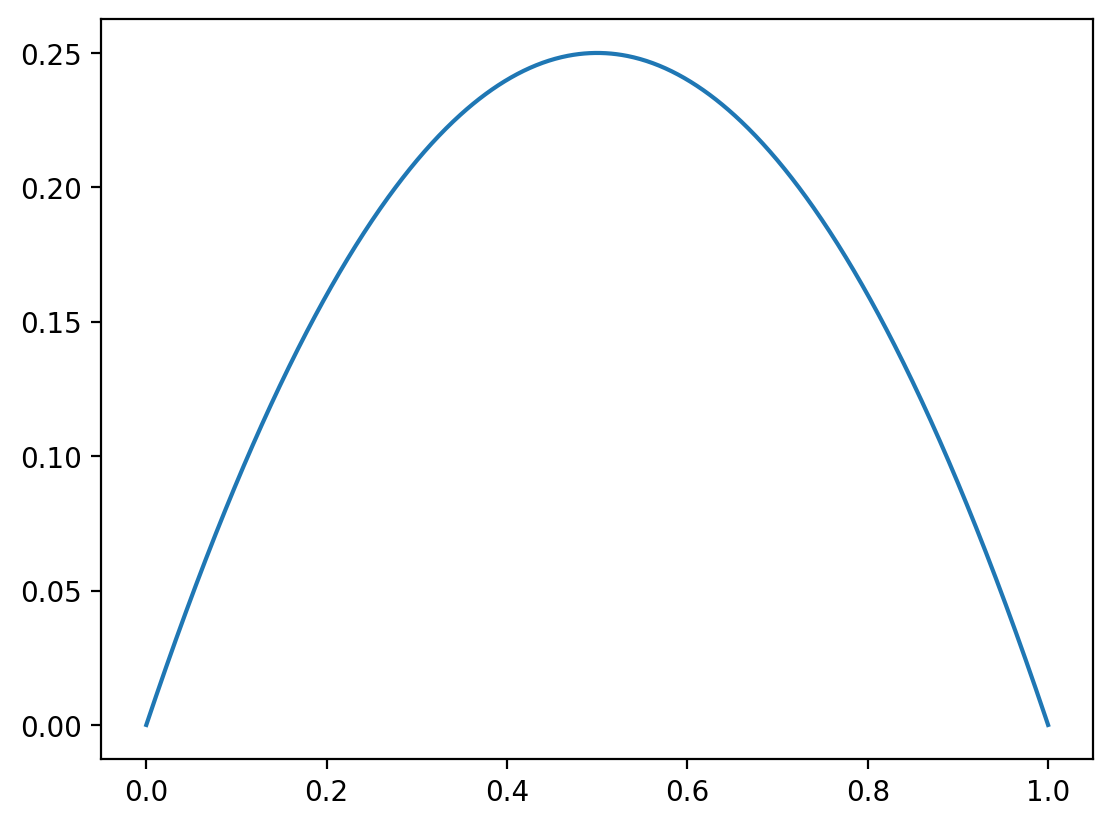

In [35]:
p = np.linspace(0, 1, 1000)

plt.plot(p, p*(1-p), label='p(1-p)')